In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

## Problem Definition

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing either user responses to marketing campaign or reducing expenses. The objective of this workbook is to predict who will respond to an offer for a product or service.

Company wants to predict **which customers to target** in their next marketing campaign. They have the previous campaign data which they want to utilize to gain further insights. Their objective is to first identify the **ideal customer profile** and then train a model on previous marketing campaigns data to predict whether the **user will accept the offer in which campaign**. Company intends to run upto 5 marketing campaigns targetting customers with an offer. But to optimize their cost, they want to know in which marketing campaign the user will convert.

## Data Collection and Understanding

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter=";")

In [62]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

First look of the data reveal that we have mix of caterogrial and numeric data. Categorial features include: **Education, Martical_Status**

*Year_Birth** feature will be transformed to age

Further, we have **Dt_Customer** feature as an object. This will need to be further transformed into the number of days the user became customer.

Let's explore it further!

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [64]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [3]:
df.dropna(subset=['Income'], inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [66]:
df[df['ID'].duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [67]:
df.iloc[0]

ID                           5524
Year_Birth                   1957
Education              Graduation
Marital_Status             Single
Income                    58138.0
Kidhome                         0
Teenhome                        0
Dt_Customer            2012-09-04
Recency                        58
MntWines                      635
MntFruits                      88
MntMeatProducts               546
MntFishProducts               172
MntSweetProducts               88
MntGoldProds                   88
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Name: 0, dtype

If company is only outreaching the customer through marketing means, the Z_costContact and Z_Reveneu should only be non-zero when user had accepted any marketing campaign; otherwise it should be zero. Which is clearly not the case here. Let's explore further to see how these variable look like.

In [63]:
df['Z_CostContact'].unique()

array([3], dtype=int64)

In [64]:
df['Z_Revenue'].unique()

array([11], dtype=int64)

Z_CostContact and Z_Revenue has 3 and 11 respectively for all the instances. Given the current state, these features don't corrospond to a meaninful understanding. Hence, these features will be be excluded from the analysis.

There are instances in which user never accepted an offer in any of the campaign, however, Response feature is indicated as 1. This is contrary to the belief that Company's criteria for qualifying for Response is different that just marketing campaign. Let's expore further on Response column.

In [4]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [4]:
# Number of customers who responded
df[df['Response']==1]['ID'].count()

334

In [5]:
# Total number of customers
df['ID'].count()

2240

We can see out of 2240 customers, only 334 responded. The question is still there, either responders are either related to marketing campaign or if fulfill some other critera.

To rule out let's check first how many users have Response and not targetted in any campaign:

In [6]:
df[df['Response'] == 1][['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0                0             0             0             0             0
8                0             0             0             0             0
15               1             0             0             0             1
33               0             0             0             0             0
39               0             0             1             0             0
...            ...           ...           ...           ...           ...
2194             0             0             1             0             0
2198             0             0             1             0             0
2202             0             0             0             0             0
2221             0             0             0             1             1
2239             0             0             0             0             0

[334 rows x 5 columns]

First look shows that there are instances in which there is Response even Company didn't target this customer. Let's explore further to see which are those instances in which there is a Response but never targetted.

In [69]:
df[(df['Response'] == 1) & 
   (df['AcceptedCmp1'] == 0) & 
   (df['AcceptedCmp2'] == 0) & 
   (df['AcceptedCmp3'] == 0) & 
   (df['AcceptedCmp4'] == 0) & 
   (df['AcceptedCmp5'] == 0)]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
8      4855        1974         PhD       Together  30351.0        1   
33     7373        1952         PhD       Divorced  46610.0        0   
46     9909        1996    2n Cycle        Married   7500.0        0   
56    10383        1966  Graduation       Divorced  70287.0        0   
...     ...         ...         ...            ...      ...      ...   
2139   2715        1966      Master       Divorced  29435.0        1   
2160   5667        1964         PhD        Married  60896.0        0   
2190   4418        1983      Master         Single  89616.0        0   
2202  11133        1973         PhD           YOLO  48432.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  2012-09-04       58       635  ...                   10   
8            0  2013-06-06       19        14  ...                    0   
33           2  2012-10-29        8        96  ...                    1   
46           0  2012-11-09       24         3  ...                    1   
56           0  2013-04-02       30       295  ...                    5   
...        ...         ...      ...       ...  ...                  ...   
2139         1  2012-08-06       11        70  ...                    2   
2160         1  2012-10-11       90      1013  ...                   10   
2190         0  2013-02-25       36       671  ...                    5   
2202         1  2012-10-18        3       322  ...                    1   
2239         1  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
8                     2                  9             0             0   
33                    6                  6             0             0   
46                    3                  9             0             0   
56                   10                  3             0             0   
...                 ...                ...           ...           ...   
2139                  2                  9             0             0   
2160                  4                  6             0             0   
2190                 12                  2             0             0   
2202                  6                  8             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
8                0             0             0         0         1  
33               0             0             0         0         1  
46               0             0             0         0         1  
56               0             0             0         0         1  
...            ...           ...           ...       ...       ...  
2139             0             0             0         0         1  
2160             0             0             0         0         1  
2190             0             0             0         0         1  
2202             0             0             0         0         1  
2239             0             0             0         0         1  

[146 rows x 27 columns]

It's clear that out of 334 total responders, 146 have never been targetted. This clearly shows, that Responder criteria is not marketing campaign only. Rathher there is some other criteria as well; which is not clear yet.

Let's explore if Company targetted a customers in any of the 5 campaigns, but customber never responded.

In [70]:
df[(df['Response'] == 0) & 
   ((df['AcceptedCmp1'] == 1) | 
   (df['AcceptedCmp2'] == 1) | 
   (df['AcceptedCmp3'] == 1) | 
   (df['AcceptedCmp4'] == 1) | 
   (df['AcceptedCmp5'] == 1))]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
9     5899        1950         PhD       Together   5648.0        1         1   
18    6565        1949      Master        Married  76995.0        0         1   
22    1993        1949         PhD        Married  58607.0        0         1   
29    1966        1965         PhD        Married  84618.0        0         0   
32    5710        1970  Graduation       Together  40548.0        0         1   
...    ...         ...         ...            ...      ...      ...       ...   
2224  4286        1970         PhD         Single  57642.0        0         1   
2228  8720        1978    2n Cycle       Together      NaN        0         0   
2230  7004        1984  Graduation         Single  11012.0        1         0   
2236  4001        1946         PhD       Together  64014.0        2         1   
2237  7270        1981  Graduation       Divorced  56981.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
9     2014-03-13       68        28  ...                    0   
18    2013-03-28       91      1012  ...                    4   
22    2012-12-23       63       867  ...                    3   
29    2013-11-22       96       684  ...                    9   
32    2012-10-10       31       110  ...                    1   
...          ...      ...       ...  ...                  ...   
2224  2014-01-09       24       580  ...                    6   
2228  2012-08-12       53        32  ...                    0   
2230  2013-03-16       82        24  ...                    1   
2236  2014-06-10       56       406  ...                    2   
2237  2014-01-25       91       908  ...                    3   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
9                     0                 20             1             0   
18                    9                  5             0             0   
22                    9                  8             0             1   
29                   10                  2             0             0   
32                    4                  5             0             1   
...                 ...                ...           ...           ...   
2224                  6                  4             1             0   
2228                  1                  0             0             1   
2230                  2                  9             1             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
9                0             0             0         0         0  
18               0             1             0         0         0  
22               0             0             0         0         0  
29               1             0             0         0         0  
32               0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2224             0             0             0         0         0  
2228             0             0             0         0         0  
2230             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  

[275 rows x 27 columns]

This is clear that there are 275 such instances in which Company targetted customers in any of their 5 campaigns, but customer never responded.

As the data tells that all the instances are for customers only; which means they have purchased any item from the Company. But as there are instances which clearly tell that Company targetted these users but there are instances when they never responded. From this it is clear the databse is not for customer acquisition through marketing campaign only, but may be for marketing campaign on exisiting customers for new products promotion. We cannot say this for sure though.

Let's explore different segments of customers base. Before that let's convert categorical variables and also convert Year_Birth into age.

Let's do not delete the Kidhome and Teenhome for now. We will explore if kids or teens affect differently at user's choices. We will decide later either to delete or not.

## Outlier Handling

In [69]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [9]:
selected_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

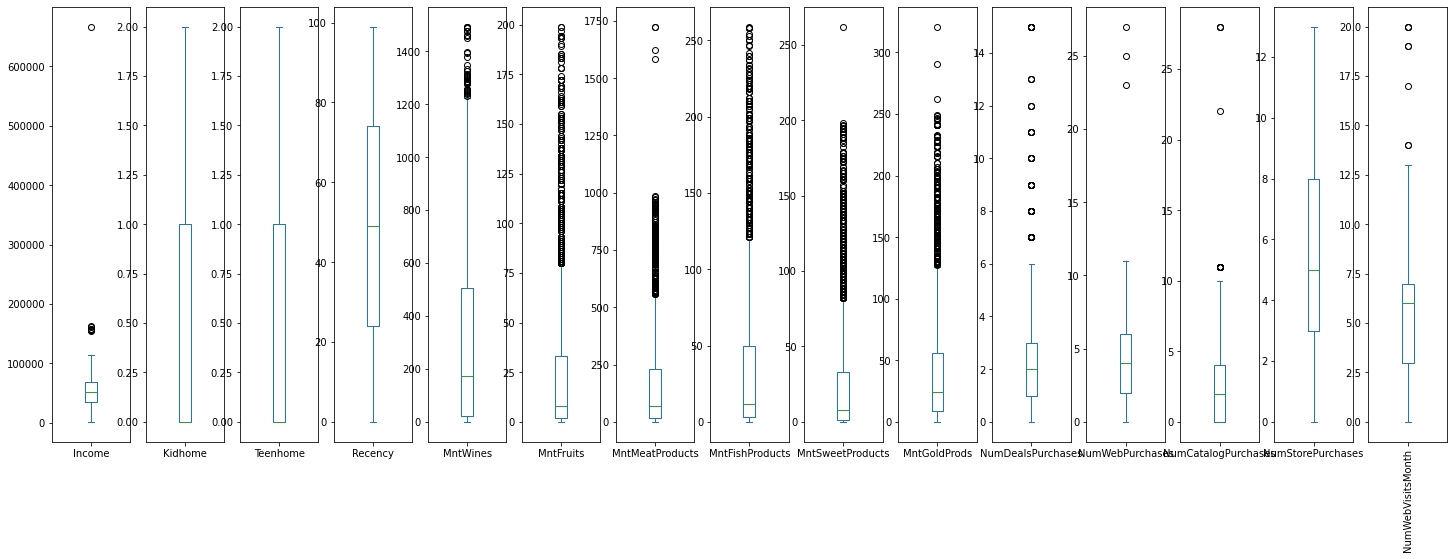

In [71]:
df[selected_cols].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(25, 8))
plt.xticks(rotation=90)
plt.show()

We can see their are no outlier in Kidhome, Teenhome, Recency, NumStorePurchaes, total_spent, and days_since_customer. Let's remove these columns to see other columns in more details.

In [12]:
select_cols = ['Income', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

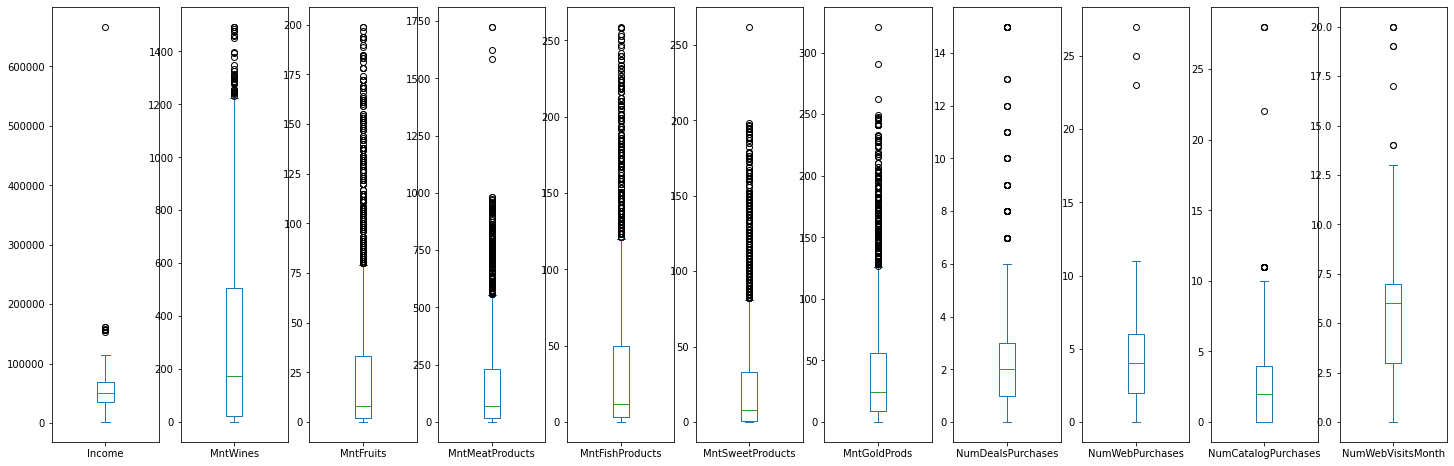

In [73]:
df[select_cols].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(25, 8))
plt.show()

In [6]:
cols = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+(2*iqr)
    lower_bound = q1 - (2*iqr)
    no_outlier_df = df[(df[col]<=upper_bound) & df[col] >=lower_bound]

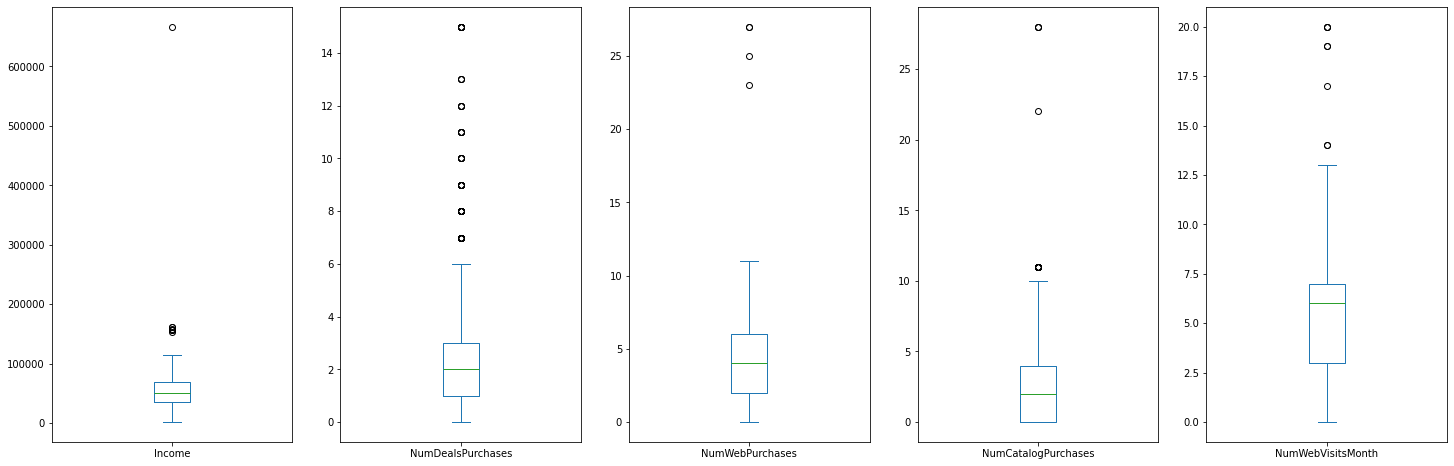

In [8]:
no_outlier_df[cols].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(25, 8))
plt.show()

In [122]:
no_outlier_df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [9]:
no_outlier_df[no_outlier_df['Income']>600000].shape[0]

1

In [7]:
no_outlier_df = no_outlier_df[no_outlier_df['Income']<600000]

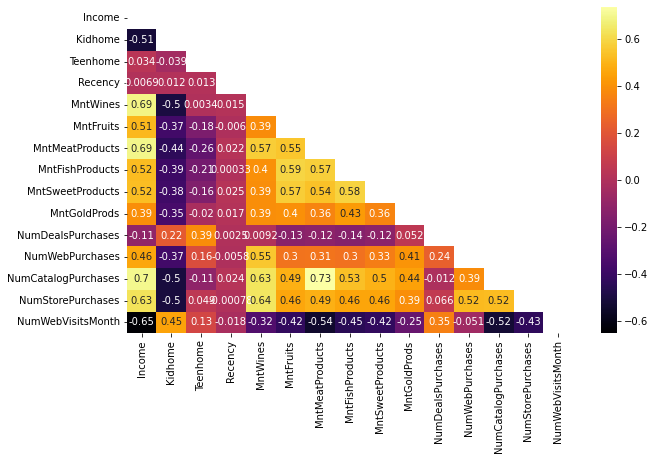

In [10]:
corr_matrix = no_outlier_df[selected_cols].select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='inferno')
plt.show()

In [138]:
no_outlier_df.reset_index(inplace=True)

In [139]:
no_outlier_df.columns

Index(['index', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [141]:
no_outlier_df.drop(['index', 'ID'], axis=1, inplace=True)

## Feature Engineering

In [142]:
# transform Year_Birth to age
no_outlier_df['age'] = no_outlier_df['Year_Birth'].apply(lambda x: 2024-x)
no_outlier_df.drop(['Year_Birth'], axis=1, inplace=True)

# transform Kidhome and Teenhome to one columns: n_kids
no_outlier_df['n_kids'] = no_outlier_df['Kidhome']+no_outlier_df['Teenhome']

# transform the Dt_customer to number of days from the cutoff date of 12-Dec-24
no_outlier_df['Dt_Customer'] = pd.to_datetime(no_outlier_df['Dt_Customer'])
no_outlier_df['days_since_customer'] = no_outlier_df['Dt_Customer'].apply(lambda x: datetime(2024, 12, 12)-x)
no_outlier_df['days_since_customer'] = no_outlier_df['days_since_customer'].dt.days
no_outlier_df.drop(['Dt_Customer'], axis=1, inplace=True)

# calculate the total amount spent by the customer throughout the lifecycle for all the categories. We will create a new column for this: total_spent
no_outlier_df['total_spent'] = no_outlier_df['MntWines'] + no_outlier_df['MntFruits'] + no_outlier_df['MntMeatProducts'] + no_outlier_df['MntFishProducts'] + no_outlier_df['MntSweetProducts'] + no_outlier_df['MntGoldProds']

## Encoding Categorical Features

In [143]:
no_outlier_df = pd.get_dummies(no_outlier_df, columns = ['Education', 'Marital_Status'], drop_first=True)

## Selection of Most Useful Features

In [144]:
from sklearn.ensemble import RandomForestClassifier

X = no_outlier_df.drop(['Response'], axis=1).copy()
y = no_outlier_df['Response']
feature_names = X.columns

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]
cumulative_importance = np.cumsum(sorted_importances)
threshold = 0.95
num_features = np.argmax(cumulative_importance >= threshold) + 1
selected_features = sorted_features[:num_features]

selected_features

['Recency',
 'days_since_customer',
 'total_spent',
 'Income',
 'MntMeatProducts',
 'MntWines',
 'MntGoldProds',
 'age',
 'MntSweetProducts',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'MntFishProducts',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'MntFruits',
 'AcceptedCmp1',
 'NumWebVisitsMonth',
 'NumDealsPurchases',
 'NumWebPurchases',
 'n_kids',
 'Marital_Status_Single',
 'Education_PhD',
 'Marital_Status_Married',
 'AcceptedCmp2',
 'Teenhome',
 'Marital_Status_Together']

In [ ]:
new_df = no_outlier_df[selected_features]

## Feature Scaling

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(new_df)

## Parameter Grid Search For Optimal Number of Clusters

In [147]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [148]:
best_score = -1
best_params = None
k_values = list(range(3, 47, 2))

param_grid = {'n_clusters':k_values}

wcss = [] # witin cluster sum of squares
sil_score = [] # silhoutte score

In [149]:
for params in ParameterGrid(param_grid):
    model = KMeans(**params)
    labels = model.fit_predict(scaled)
    
    wcss.append(model.inertia_)
    
    score = silhouette_score(scaled, labels)
    sil_score.append(score)
    
    if score > best_score:
        best_score = score
        best_params = params
        

In [150]:
print('Best Params: ', best_params, 'Best Silhouette Score: ', best_score)

Best Params:  {'n_clusters': 3} Best Silhouette Score:  0.16020091848338822


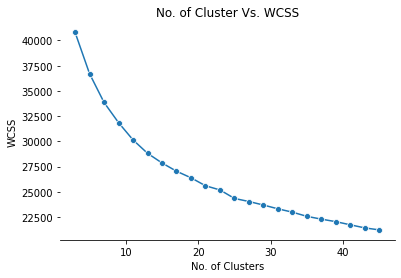

In [166]:
sns.lineplot(x=k_values, y=wcss, marker='o')
sns.despine(left=True)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('No. of Cluster Vs. WCSS')
plt.show()

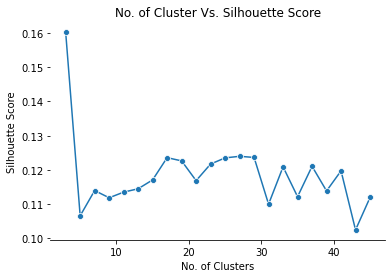

In [167]:
sns.lineplot(x=k_values, y=sil_score, marker='o')
sns.despine(left=True)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.title('No. of Cluster Vs. Silhouette Score')
plt.show()

The WCSS (Within-Cluster Sum of Squares) did not reveal a clear elbow pattern. However, the Silhouette score was highest at 3 clusters. Therefore, for now, I will conclude that 3 clusters are ideal for this dataset. Let’s proceed by rerunning the KMeans algorithm with 3 clusters as the hyperparameter.

In [170]:
model = KMeans(
    n_clusters = best_params['n_clusters'],
    random_state = 42,
    )

new_df['cluster'] = model.fit_predict(scaled)

In [181]:
features = ['Recency',
 'days_since_customer',
 'total_spent',
 'Income',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntFishProducts',
 'NumWebVisitsMonth',
 'NumDealsPurchases',
 'Teenhome',
 'cluster']

<Figure size 720x576 with 0 Axes>

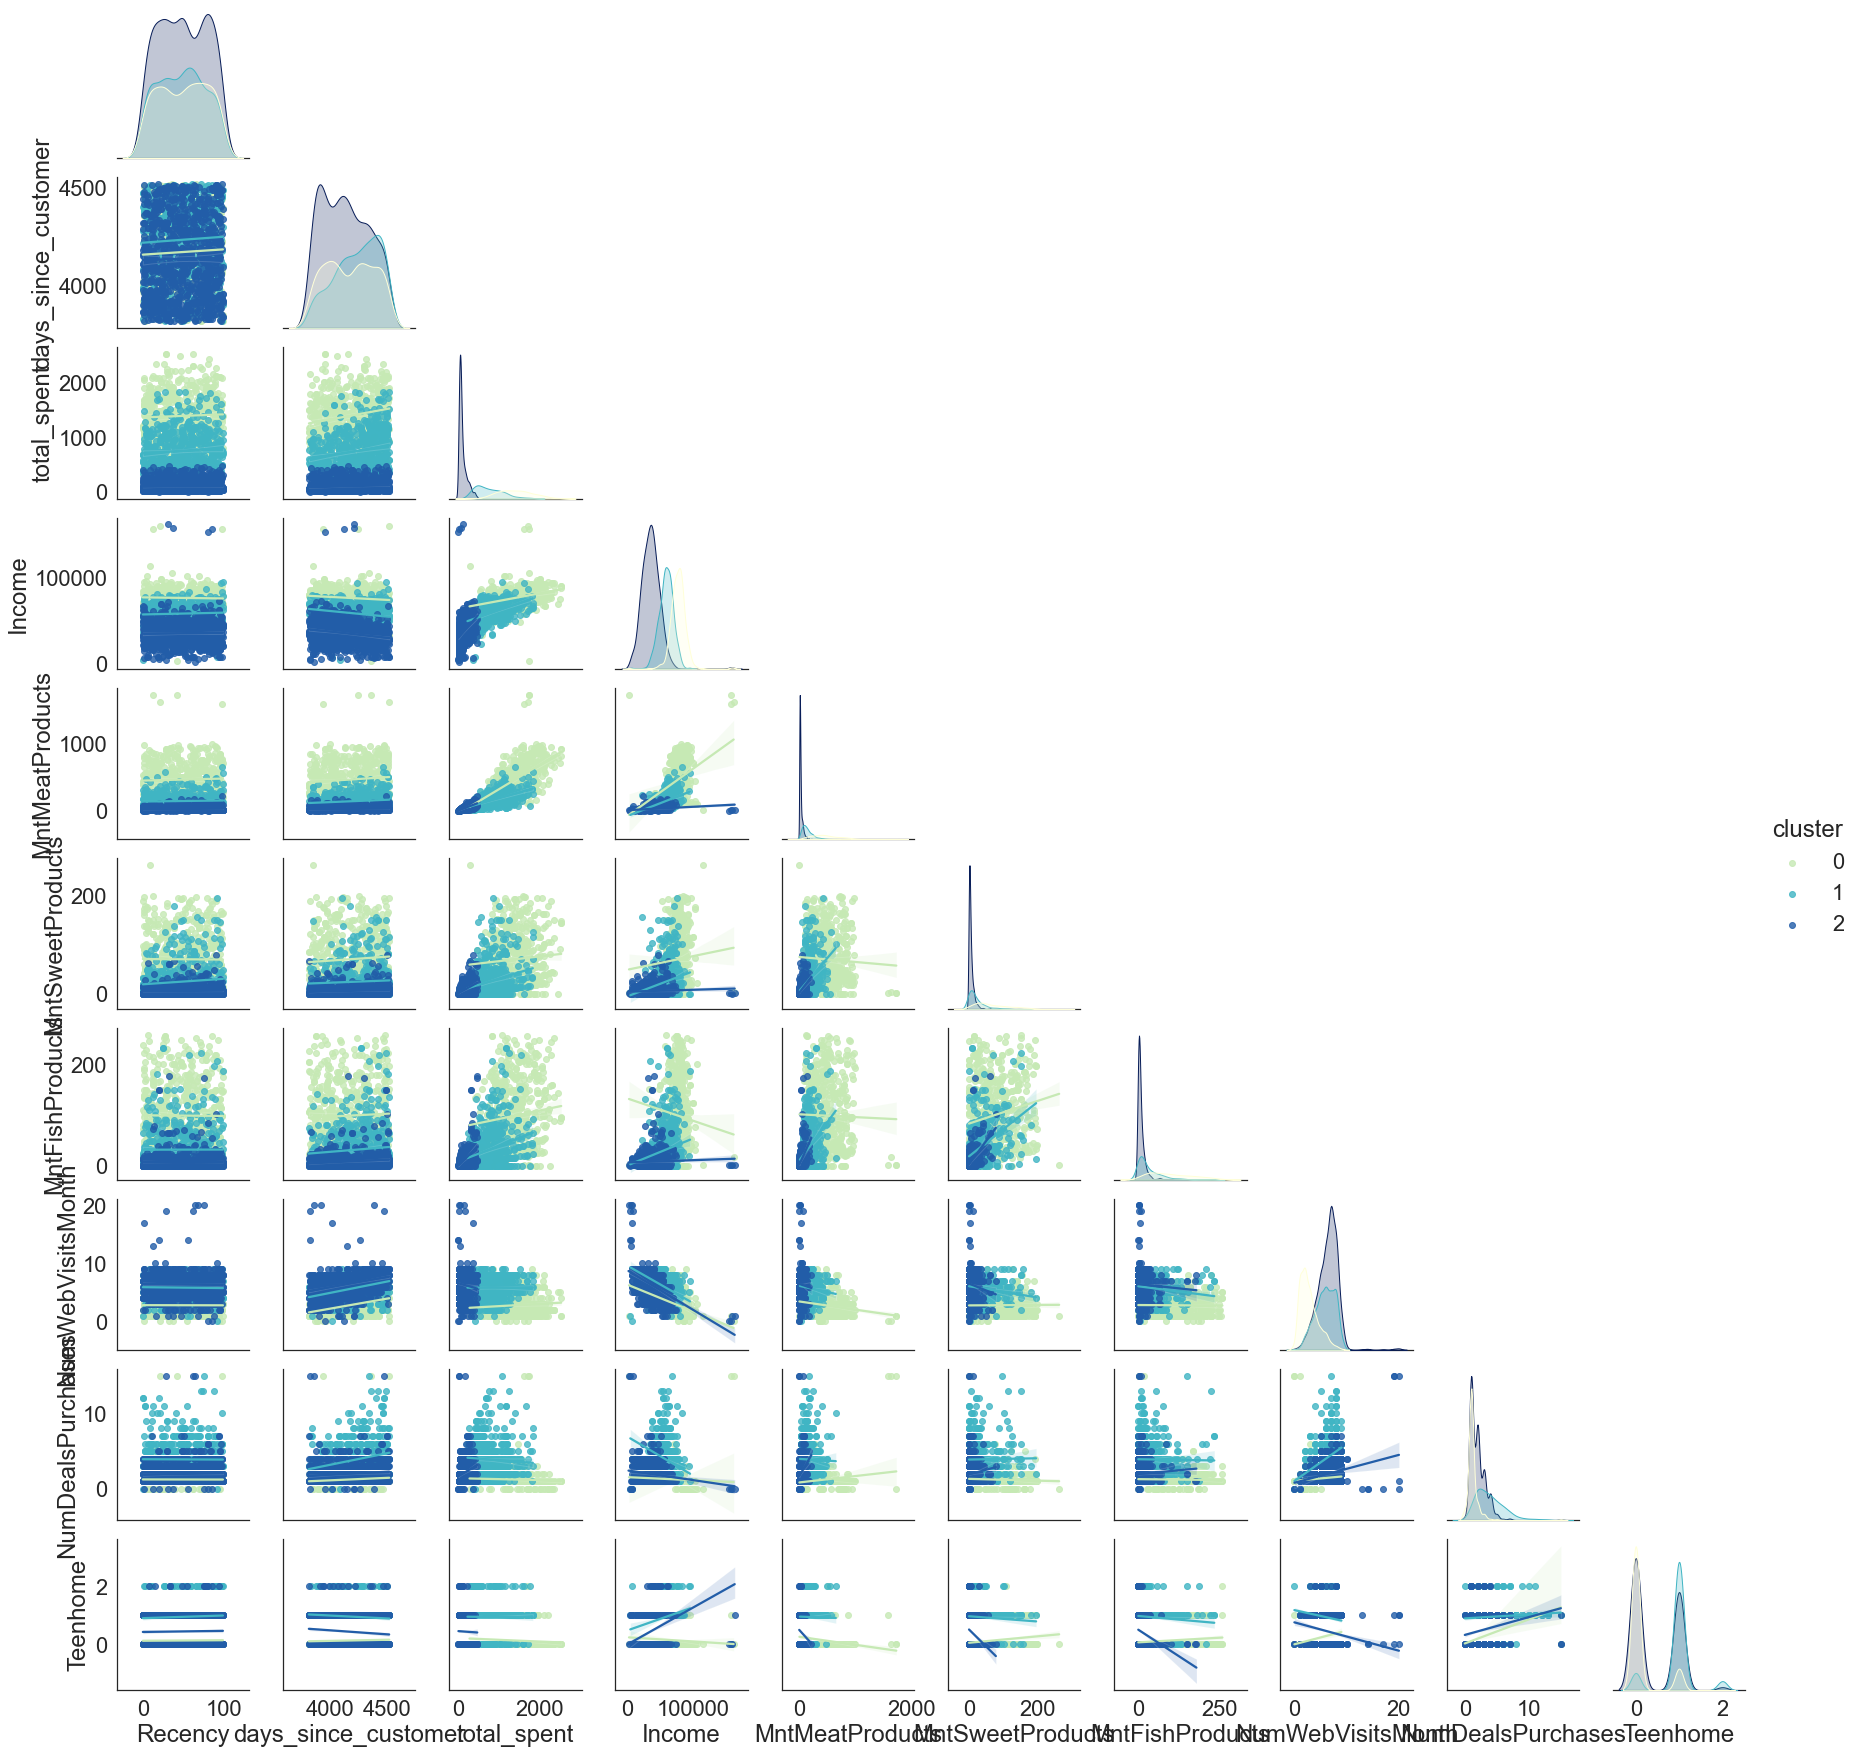

In [187]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(new_df[features], kind = 'reg', corner = True, palette ='YlGnBu', hue='cluster')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

Let's plot few relationships to determine which cluster is of interest.

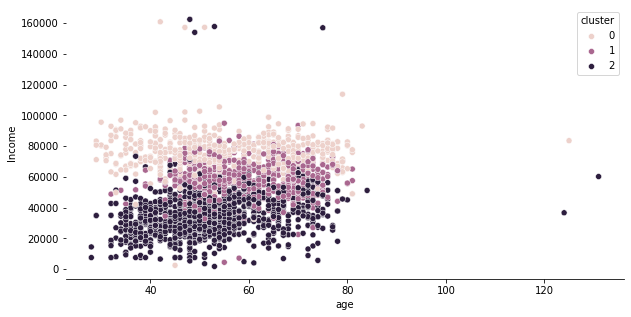

In [155]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=new_df, x='age', y='Income', hue='cluster')
sns.despine(left=True)
plt.show()

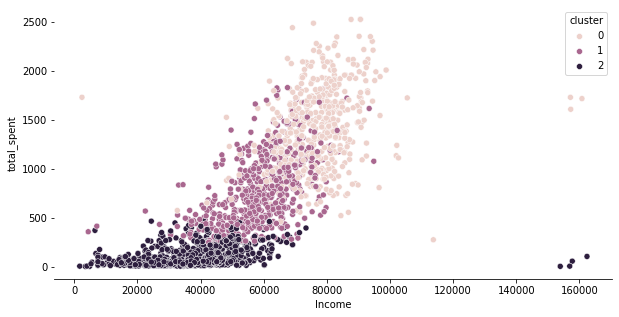

In [156]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=new_df, x='Income', y='total_spent', hue='cluster')
sns.despine(left=True)
plt.show()

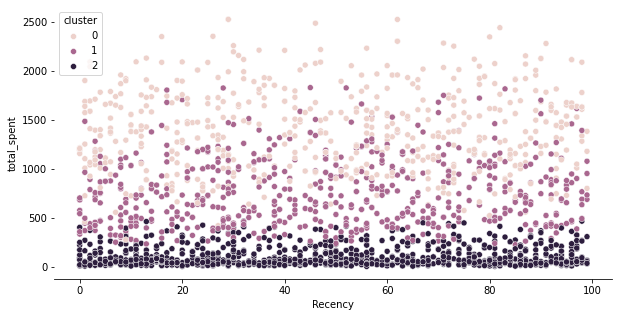

In [157]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=new_df, x='Recency', y='total_spent', hue='cluster')
sns.despine(left=True)
plt.show()

In [189]:
new_df.groupby(by='cluster')[['Income', 'total_spent', 'MntMeatProducts']].describe().T

cluster                            0             1              2
Income          count     559.000000    608.000000    1048.000000
                mean    76524.393560  58192.106908   35262.696565
                std     11881.489498  10937.934989   14542.802818
                min      2447.000000   4428.000000    1730.000000
                25%     70293.500000  51508.250000   26085.000000
                50%     76653.000000  58554.000000   34733.000000
                75%     82347.000000  65337.750000   43018.500000
                max    160803.000000  94871.000000  162397.000000
total_spent     count     559.000000    608.000000    1048.000000
                mean     1393.747764    754.457237     102.482824
                std       417.608714    344.727471      94.765461
                min       277.000000    227.000000       5.000000
                25%      1081.500000    470.000000      38.750000
                50%      1370.000000    688.500000      65.000000
                75%      1676.500000    990.500000     137.000000
                max      2525.000000   1829.000000     467.000000
MntMeatProducts count     559.000000    608.000000    1048.000000
                mean      461.774597    142.445724      24.146947
                std       248.072995     99.349749      26.628352
                min         3.000000     12.000000       0.000000
                25%       272.500000     70.000000       8.000000
                50%       424.000000    118.500000      15.000000
                75%       605.000000    184.000000      29.000000
                max      1725.000000    650.000000     217.000000

In [190]:
new_df.groupby(by='cluster')[['NumDealsPurchases', 'Teenhome']].describe().T

cluster                           0           1            2
NumDealsPurchases count  559.000000  608.000000  1048.000000
                  mean     1.237925    3.902961     1.984733
                  std      1.222076    2.297221     1.333485
                  min      0.000000    0.000000     0.000000
                  25%      1.000000    2.000000     1.000000
                  50%      1.000000    3.000000     2.000000
                  75%      1.000000    5.000000     3.000000
                  max     15.000000   15.000000    15.000000
Teenhome          count  559.000000  608.000000  1048.000000
                  mean     0.134168    0.947368     0.447519
                  std      0.346352    0.410560     0.523665
                  min      0.000000    0.000000     0.000000
                  25%      0.000000    1.000000     0.000000
                  50%      0.000000    1.000000     0.000000
                  75%      0.000000    1.000000     1.000000
                  max      2.000000    2.000000     2.000000

In [160]:
new_df[new_df['cluster'] == 0].describe().T

count          mean           std     min      25%  \
Recency              559.0     49.449016     29.541608     0.0     23.0   
days_since_customer  559.0   4171.695886    206.093196  3820.0   3992.0   
total_spent          559.0   1393.747764    417.608714   277.0   1081.5   
Income               559.0  76524.393560  11881.489498  2447.0  70293.5   
MntMeatProducts      559.0    461.774597    248.072995     3.0    272.5   
MntWines             559.0    617.495528    324.682259     1.0    369.5   
MntGoldProds         559.0     77.218247     60.343066     0.0     32.0   
age                  559.0     55.543828     13.723765    29.0     45.0   
MntSweetProducts     559.0     70.069767     52.242821     0.0     29.0   
AcceptedCmp3         559.0      0.082290      0.275052     0.0      0.0   
AcceptedCmp5         559.0      0.271914      0.445344     0.0      0.0   
MntFishProducts      559.0     99.407871     66.172320     0.0     43.0   
NumStorePurchases    559.0      8.386404      2.911027     0.0      6.0   
NumCatalogPurchases  559.0      6.046512      2.916641     0.0      4.0   
MntFruits            559.0     67.781753     51.123075     0.0     26.0   
AcceptedCmp1         559.0      0.220036      0.414642     0.0      0.0   
NumWebVisitsMonth    559.0      2.776386      1.740848     0.0      1.0   
NumDealsPurchases    559.0      1.237925      1.222076     0.0      1.0   
NumWebPurchases      559.0      5.112701      2.330221     0.0      4.0   
n_kids               559.0      0.173524      0.388380     0.0      0.0   
AcceptedCmp2         559.0      0.033989      0.181364     0.0      0.0   
Teenhome             559.0      0.134168      0.346352     0.0      0.0   
cluster              559.0      0.000000      0.000000     0.0      0.0   

                         50%      75%       max  
Recency                 52.0     74.0      99.0  
days_since_customer   4179.0   4351.0    4517.0  
total_spent           1370.0   1676.5    2525.0  
Income               76653.0  82347.0  160803.0  
MntMeatProducts        424.0    605.0    1725.0  
MntWines               563.0    838.0    1493.0  
MntGoldProds            56.0    111.0     249.0  
age                     55.0     66.5     125.0  
MntSweetProducts        56.0    105.0     262.0  
AcceptedCmp3             0.0      0.0       1.0  
AcceptedCmp5             0.0      1.0       1.0  
MntFishProducts         90.0    149.5     259.0  
NumStorePurchases        8.0     11.0      13.0  
NumCatalogPurchases      6.0      7.0      28.0  
MntFruits               54.0    102.0     197.0  
AcceptedCmp1             0.0      0.0       1.0  
NumWebVisitsMonth        2.0      4.0       9.0  
NumDealsPurchases        1.0      1.0      15.0  
NumWebPurchases          5.0      6.0      27.0  
n_kids                   0.0      0.0       2.0  
AcceptedCmp2             0.0      0.0       1.0  
Teenhome                 0.0      0.0       2.0  
cluster                  0.0      0.0       0.0

In [185]:
new_df.groupby(by='cluster')[['total_spent']].count()

total_spent
cluster             
0                559
1                608
2               1048

In [186]:
new_df.groupby(by='cluster')[['total_spent']].sum()

total_spent
cluster             
0             779105
1             458710
2             107402

In [81]:
import plotly.express as px

In [82]:
fig = px.scatter_3d(new_df, x='Recency', y='total_spent', z='Income', color='cluster')
fig.show()

We can see number of customers in cluster 2 the lowest, however have the highest income and spent the most. Targetting such customers can be beneficial for the business. Let's explore what features are representative of this cluster.

As we are now interested only in cluster 2, and not the other clusters (0 and 1). Let's consider this a binary classification case and transform the cluster column values either 1 for our cluster 1 or 0 otherwise.

In [191]:
new_df['cluster'] = new_df['cluster'].map({0:1, 1:0, 2:0})

## DecisionTreeClassifier to Generate Cluster Descriptions

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [193]:
X = new_df.drop(['cluster'], axis=1)
y = new_df['cluster']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

classifier = DecisionTreeClassifier(ccp_alpha=0.01)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       344
           1       0.81      0.87      0.84        99

    accuracy                           0.93       443
   macro avg       0.89      0.91      0.90       443
weighted avg       0.93      0.93      0.93       443



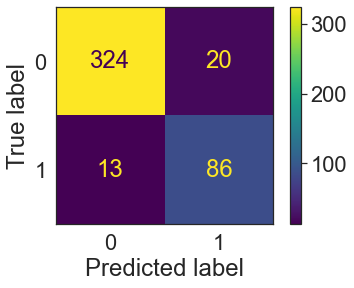

In [195]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [197]:
from sklearn.tree import export_text

In [198]:
export_text(classifier, feature_names=list(X.columns), show_weights=True)

'|--- MntMeatProducts <= 258.00\n|   |--- Income <= 70606.50\n|   |   |--- weights: [1231.00, 36.00] class: 0\n|   |--- Income >  70606.50\n|   |   |--- weights: [31.00, 63.00] class: 1\n|--- MntMeatProducts >  258.00\n|   |--- NumDealsPurchases <= 2.50\n|   |   |--- weights: [11.00, 342.00] class: 1\n|   |--- NumDealsPurchases >  2.50\n|   |   |--- weights: [39.00, 19.00] class: 0\n'

In [199]:
print(classifier.classes_)

[0 1]


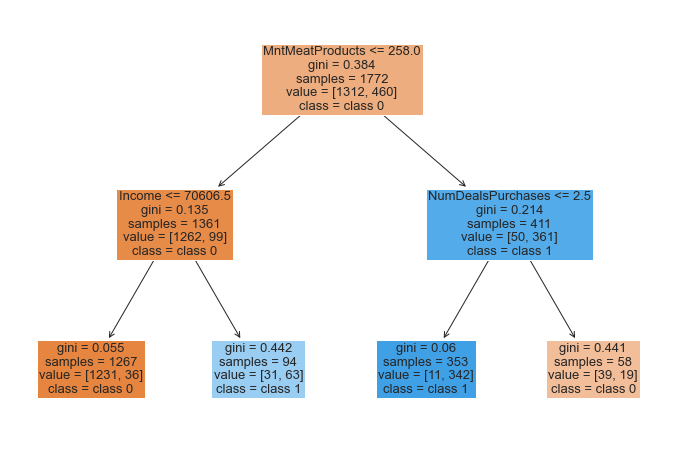

In [205]:
from sklearn.tree import export_text
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=list(X.columns), class_names=["class 0", "class 1"], filled=True, max_depth=10)
plt.show()

**Ideal Customer:**

MntMeatProducts expenditure > 258 and with NumDealsPurchases <= 2

Or

They may have Income > 70,606

In [55]:
new_df[(new_df['MntMeatProducts'] > 253.5) & (new_df['NumDealsPurchases'] <= 2.5)].groupby('cluster')['cluster'].count()

cluster
0     16
2    420
Name: cluster, dtype: int64

In [56]:
new_df[(new_df['MntMeatProducts'] < 253.5) & (new_df['Income'] > 70462) & (new_df['Teenhome'] <= 0.5)].groupby('cluster')['cluster'].count()

cluster
0     2
2    54
Name: cluster, dtype: int64

In [57]:
new_df['income_group'] = pd.qcut(new_df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\baqar\AppData\Local\Temp\ipykernel_21044\1113756072.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



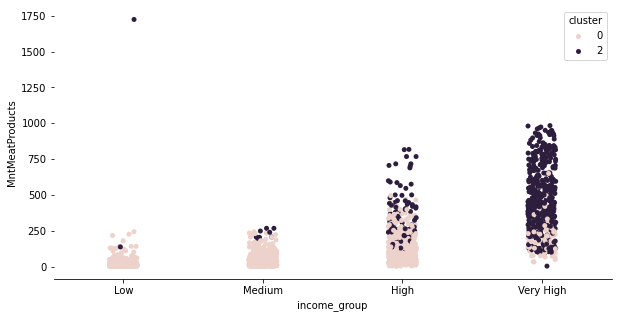

In [58]:
plt.figure(figsize = (10, 5))
sns.stripplot(data=new_df, x='income_group', y='MntMeatProducts', hue='cluster')
sns.despine(left=True)
plt.show()

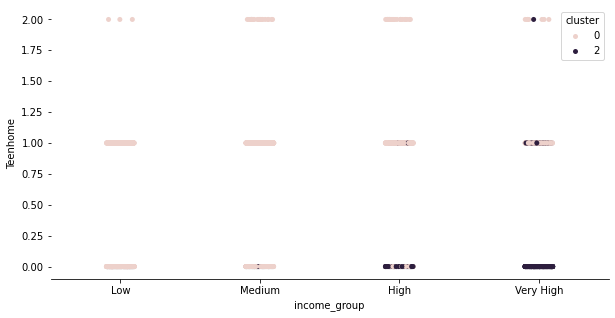

In [59]:
plt.figure(figsize = (10, 5))
sns.stripplot(data=new_df, x='income_group', y='Teenhome', hue='cluster')
sns.despine(left=True)
plt.show()

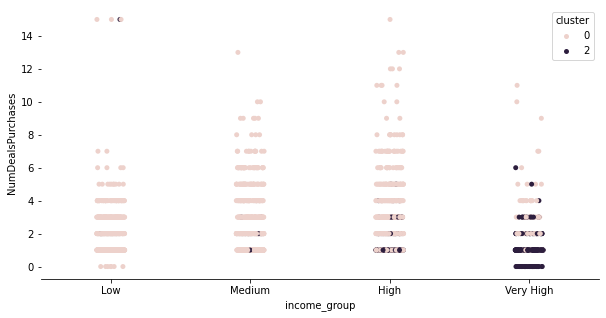

In [60]:
plt.figure(figsize = (10, 5))
sns.stripplot(data=new_df, x='income_group', y='NumDealsPurchases', hue='cluster')
sns.despine(left=True)
plt.show()